In [1]:
import sys
sys.path.append('..')

In [2]:
from math import atan, sin, cos
from matrix import *
from copy import deepcopy
import numpy as np

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
test_matrix = [
    [4,2,1],
    [2,5,3],
    [1,3,6],
]

In [5]:
def get_index_max_abs_elem(matrix):
    l,m = 0,1
    max_abs_elem = matrix[l][m]
    for i in range(len(matrix)):
        for j in range(i+1,len(matrix[i])):
            if max_abs_elem < abs(matrix[i][j]):
                max_abs_elem = abs(matrix[i][j])
                l = i
                m = j
    return l,m
def calc_t(matrix):
    sum_t = 0
    for i in range(len(matrix)):
        for j in range(i+1,len(matrix[i])):
            sum_t += matrix[i][j]**2
    sum_t = sum_t**0.5
    return sum_t




In [19]:
def get_eigval_eigvec_method_jacobi(matrix,precision):
    e = precision
    A_k = deepcopy(matrix)
    n = len(A_k)
    U_result = []
    k = -1
    while True:
        k+=1
        l,m = get_index_max_abs_elem(A_k)
        phi = 0.5*atan(2*A_k[l][m]/(A_k[l][l] - A_k[m][m]))
        U = get_matrix_eye(n)
        U[l][m] = -sin(phi)
        U[m][l] = sin(phi)
        U[l][l] = cos(phi)
        U[m][m] = cos(phi)
        U_t = transporate(U)
        A_next  = calc_mult_matrix(calc_mult_matrix(U_t,A_k),U)
        A_k = deepcopy(A_next)
        e_k = calc_t(A_next)
        if k == 0:
            U_result = U
        else:
            U_result = calc_mult_matrix(U_result,U)
        if e_k <= e:
            break
    eigval = [A_k[i][i] for i in range(n)]
    eigvec = [[U_result[i][j] for i in range(len(U_result))] for j in range(len(U_result[0]))]
    return eigval,eigvec, k 

In [20]:
eigval, eigvec, k = get_eigval_eigvec_method_jacobi(test_matrix,10**(-5))

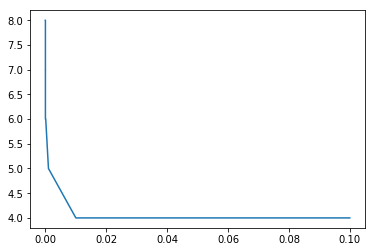

In [24]:
precs = [10**(-i) for i in range(1,15)]
ks = [get_eigval_eigvec_method_jacobi(test_matrix,precs[i])[2] for i in range(len(precs))]

plt.plot(precs,ks)